<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Подготовка-данных-для-исследования" data-toc-modified-id="Подготовка-данных-для-исследования-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных для исследования</a></span></li><li><span><a href="#Исследование-моделей" data-toc-modified-id="Исследование-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследование моделей</a></span></li><li><span><a href="#Проверка-качества-выбранной-модели" data-toc-modified-id="Проверка-качества-выбранной-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка качества выбранной модели</a></span></li><li><span><a href="#Проверка-моделей-на-адекватность" data-toc-modified-id="Проверка-моделей-на-адекватность-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка моделей на адекватность</a></span></li><li><span><a href="#Итоги-проекта" data-toc-modified-id="Итоги-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Итоги проекта</a></span></li></ul></div>

# Рекомендация тарифов

Результат исследования позволит оператору мобильной связи построить рекомендательную систему для пользователей с архивными тарифами, которая, на основе анализа поведения этих клиентов, будет предлагать им новый тарифный план.



**Цель исследования**
  1. Нужно построить модель, с максимально большой точностью, для задачи классификации, которая выберет подходящий тариф.
  2. Доля правильных ответов модели должна быть не менее 0.75.
  3. Точность модели, дополнительно, необходимо проверить на тестовой выборе.

    
**Исследование пройдёт в пять этапов:**
 1. Обзор данных;
 2. Подготовка данных для исследования;
 3. Исследование моделей;
 4. Проверка качества выбранной модели;
 5. Проверка моделей на адекватность.

## Обзор данных

Составим первое представление о данных о поведении клиентов.

**1. Импортируем библиотеку pandas и другие. Считаем данные из csv-файла в датафрейм и сохраним в переменную `df`.**

In [1]:
# обновим библиотеку 'scikit-learn' до последней версии
!pip install --upgrade scikit-learn

In [2]:
# импорт библиотеку 'pandas'
import pandas as pd

# импортируем библиотеку 'matplotlib.pyplot' для построения графиков
import matplotlib.pyplot as plt

# импорт библиотеки для константной модели
from sklearn.dummy import DummyClassifier

# импорт библиотеки для модели "рещающего дерева"
from sklearn.tree import DecisionTreeClassifier

# импорт библиотеки для модели "случайнного леса"
from sklearn.ensemble import RandomForestClassifier

# импорт библиотеки для модели "лигистической регрессии"
from sklearn.linear_model import LogisticRegression

# импорт библиотеки для оценки качества модели
from sklearn.metrics import (accuracy_score,
                            precision_score,
                            recall_score,
                            f1_score,
                            roc_auc_score,
                            average_precision_score,
                            confusion_matrix,
                            ConfusionMatrixDisplay)

# импорт библиотеки для кросс-валидации
from sklearn.model_selection import (train_test_split,
                                     GridSearchCV,
                                     cross_val_score)

import time

In [11]:
try:
    # читаем данные из csv-файла и сохраняем их в виде датафрейма в 'df'
    df = pd.read_csv('***')
except:
    # в случае отсутствия csv-файла в локальном месторасположении, читаем его из облачного хранилища
    # и сохраняем данные в виде датафрейма в 'df'
    df = pd.read_csv('***')

**2. Выведем первые пять строчек датафрейма `df` на экран.**

In [12]:
# посмотрим первых пять строк датафрейма 'df
df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


**3. Выведем основную информацию о датафрейме с помощью метода `info()`.**

In [13]:
# получение общей информации о данных в датафрейме 'df'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


Итак, в таблице 5 столбцов. Типы данных в столбцах — `float64` и `int64`.

* `сalls`    — количество звонков,
* `minutes`  — суммарная длительность звонков в минутах,
* `messages` — количество sms-сообщений,
* `mb_used`  — израсходованный интернет-трафик в Мб,
* `is_ultra` — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).

Количество значений в столбцах одинаковое и соответствует общему количеству записей в таблице по индексу.

**4. Построим общую гистограмму для всех числовых столбцов таблицы в датафрейме `df`.**

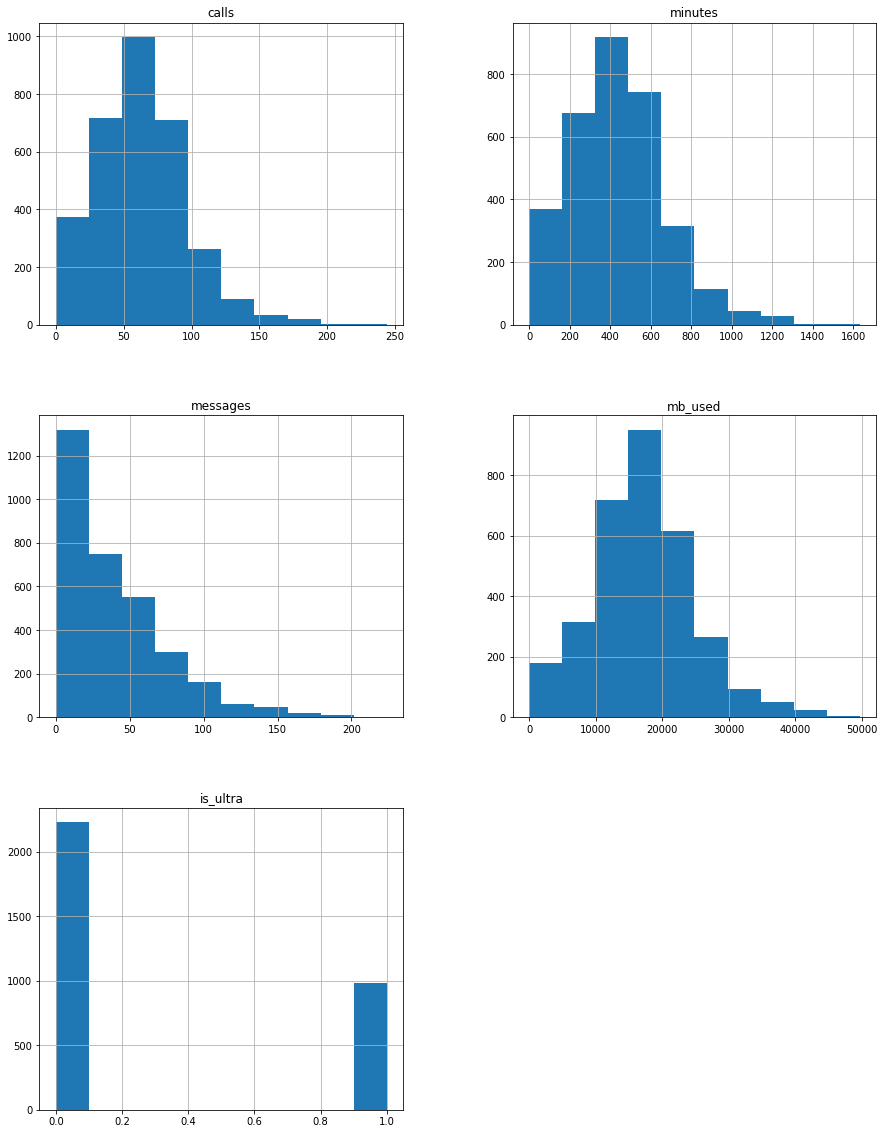

In [14]:
# с помощью функции 'hist' построим общую гистограмму
df.hist(figsize=(15, 20));

**5. Посмотрим статистическую информацию по каждому числовому столбцу таблицы, в датафрейме `df`.**

In [15]:
# выведем статистическую информацию
df.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


**Выводы**

Можно утверждать, что данных достаточно для исследования. Пропуски, артефакты, дубликаты и иные аномалии, отсутствуют. Столбцы содержат подходящие типы данных. В названиях колонок (столбцов) таблицы, отсутствуют нарушение стиля.

## Подготовка данных для исследования

Разделим исходные данные на обучающую, валидационную и тестовую выборки.

**6. Создадим отдельные датафремы с признаками и целевым признаком.**

In [16]:
features = df.drop(['is_ultra'], axis=1)

In [17]:
target = df['is_ultra']

**7. Разделим исходные данные на три выборки: обучающую, валидационную и тестовую.**

Применим метод кросс-валидации: "Hold-out".

In [18]:
# создадим переменную 'random_state' для фиксации псевдослучайности для алгоритма обучения
# и других алгоритмов в нашем проекте
random_state = 753

In [19]:
# на первом шаге, мы разделим набор данных на обучающую выборку (60%) и остальные данные (40%)
# для этого мы установим параметр 'train_size' = 0.60
features_train, features_remain, target_train, target_remain = train_test_split(
    features, target, train_size=0.60, random_state=random_state)

In [20]:
# на втором шаге, мы разделим оставшийся набор данных (40% от исходных данных) пополам, на валидационную
# и тестовую выборки,  чтобы каждая из них составляла 20% от исходных данных. 
# для этого установим параметр 'test_size' = 0.5
features_valid, features_test, target_valid, target_test = train_test_split(
    features_remain, target_remain, test_size=0.50, random_state=random_state)

In [21]:
# выведем размер полученной обучающей выборки признаков
features_train.shape

(1928, 4)

In [22]:
# выведем размер полученной обучающей выборки целевого признака
target_train.shape

(1928,)

In [23]:
# выведем размер полученной валидационной выборки признаков
features_valid.shape

(643, 4)

In [24]:
# выведем размер полученной валидационной выборки целевого признака
target_valid.shape

(643,)

In [25]:
# выведем размер полученной тестовой выборки признаков
features_test.shape

(643, 4)

In [26]:
# выведем размер полученной тестовой выборки целевого признака
target_test.shape

(643,)

**Выводы**

Мы создали:
 - глобальную переменную `random_state`, в которой зафиксировали выбранную нами псевдослучайность, для дальнейшего использования на всех этапах исследования. 
 - отдельные датафреймы, содержащие признаки и целевой признак для каждой выборки: обучающей, валидационной и тестовой.

## Исследование моделей

Для задачи классификации мы рассмотрим три популярных модели: решающее дерево, случайный лес и логистическая регрессия.

**8. Исследуем модель на основе "решающего дерева".**

In [27]:
# функция исследования модели "решающего дерева" с различными гиперпараметрами
# трудоемкость функции О(max_depth_range * (min_samples_split_range - 1) 
#                        * min_samples_leaf_range * 2 * 3)
def decision_tree(features_train,
                  target_train,
                  features_valid,
                  target_valid,
                  max_depth_range,
                  min_samples_split_range,
                  min_samples_leaf_range, 
                  random_state):

    best_accuracy = 0.
    
    best_criterion = ""
    best_splitter = ""
    best_max_depth = 0
    best_min_samples_split = 0
    best_min_samples_leaf = 0
    
    for min_samples_split in range(2, min_samples_split_range):
        for min_samples_leaf in range(1, min_samples_leaf_range):
            for splitter in ["best", "random"]:
                for criterion in ['gini', 'entropy', 'log_loss']:
                    for max_depth in range(1, max_depth_range):
    
                        # создадим модель с заданными гиперпараметрами
                        model = DecisionTreeClassifier(criterion=criterion,
                                                       splitter=splitter,
                                                       max_depth=max_depth,
                                                       min_samples_split=min_samples_split,
                                                       min_samples_leaf=min_samples_leaf,
                                                       random_state=random_state)
    
                        # обучим модель на тренировочной выборке
                        model.fit(features_train, target_train)
            
                        # получим предсказания модели на валидационной выборке
                        predictions_valid = model.predict(features_valid) 
     
                        # вычислим долю правильных ответов на валидационной выборке
                        accuracy = accuracy_score(target_valid, predictions_valid)
    
                        if accuracy > best_accuracy:
                            best_accuracy = accuracy
                
                            best_criterion = criterion
                            best_splitter = splitter
                            best_max_depth = max_depth
                            best_min_samples_split = min_samples_split
                            best_min_samples_leaf = min_samples_leaf
                            
    
    return {'best_accuracy' : best_accuracy,
            'best_criterion' : best_criterion,
            'best_splitter' : best_splitter,
            'best_max_depth' : best_max_depth,
            'best_min_samples_split' : best_min_samples_split,
            'best_min_samples_leaf' : best_min_samples_leaf}

In [28]:
# найдем максимально эффективные гиперпараметры модели

max_depth_range = 11
min_samples_split_range = 11
min_samples_leaf_range = 11

result_map = decision_tree(features_train,
                           target_train,
                           features_valid,
                           target_valid,
                           max_depth_range=max_depth_range,
                           min_samples_split_range=min_samples_split_range,
                           min_samples_leaf_range=min_samples_leaf_range,  
                           random_state=random_state)

display("Модель: DecisionTreeClassifier" + 
        ", best_accuracy : " + str(result_map.get('best_accuracy')) +
        ", best_criterion : " + result_map.get('best_criterion') +
        ", best_splitter : " + result_map.get('best_splitter') +
        ", best_max_depth : " +  str(result_map.get('best_max_depth')) +
        ", best_min_samples_split : " + str(result_map.get('best_min_samples_split')) +
        ", best_min_samples_leaf : " + str(result_map.get('best_min_samples_leaf')))

'Модель: DecisionTreeClassifier, best_accuracy : 0.8133748055987559, best_criterion : entropy, best_splitter : random, best_max_depth : 5, best_min_samples_split : 2, best_min_samples_leaf : 6'

In [29]:
# функция вычисляет время работы модели в миллисекундах
def model_running_time(model,
                       features_valid):

    start = time.monotonic_ns()
    
    # получим предсказания модели на валидационной выборке
    predictions_valid = model.predict(features_valid) 
     
    # вычисляем время работы модели и переводим его из наносекунд в миллисекунды
    return (time.monotonic_ns() - start) / 1000000

In [30]:
# создадим модель с заданными гиперпараметрами
dtc_model = DecisionTreeClassifier(criterion="entropy",
                               splitter="random",
                               max_depth=5,
                               min_samples_split=2,
                               min_samples_leaf=6,
                               random_state=random_state)

# обучим модель на тренировочной выборке
dtc_model.fit(features_train, target_train)

# время работы модели в миллисекундах
model_running_time(model=dtc_model,
                   features_valid=features_valid)

1.164506

Лучший результат модели на основе "решающего дерева", на валидационной выборке:
 - доля правильных ответов: **0.8133748055987559**;
 - при гиперпараметрах модели: 
     * `criterion` - **entropy**;
     * `splitter` - **random**;
     * `max_depth` -  **5**;
     * `min_samples_split` - **2**;
     * `min_samples_leaf` - **6**.
     
Время работы лучшей модели на основе "решающего дерева": `1.4` миллисекунд.

**9. Исследуем модель на основе "случайного леса".**

In [31]:
# функция исследования модели "случайного леса" с различными гиперпараметрами
# трудоемкость функции О(((n_estimators_range - 10)/ n_estimators_step) * max_depth_range
#                        * (min_samples_split_range - 1) * min_samples_leaf_range * 3)
def random_forest(features_train,
                  target_train,
                  features_valid,
                  target_valid,
                  n_estimators_range,
                  n_estimators_step,
                  max_depth_range,
                  min_samples_split_range,
                  min_samples_leaf_range,            
                  random_state,
                  n_jobs=-1):
        
        
    best_accuracy = 0.
    
    best_n_estimators = 0
    best_criterion = ""
    best_max_depth = 0
    best_min_samples_split = 0
    best_min_samples_leaf = 0
    
    for min_samples_split in range(2, min_samples_split_range):
        for min_samples_leaf in range(1, min_samples_leaf_range):
            for criterion in ["gini", "entropy", "log_loss"]:
                for est in range(10, n_estimators_range, n_estimators_step):
                    for max_depth in range(1, max_depth_range):
    
                        # создадим модель с заданными гиперпараметрами
                        model = RandomForestClassifier(n_estimators=est,
                                                       criterion=criterion,
                                                       max_depth=max_depth,
                                                       min_samples_split=min_samples_split,
                                                       min_samples_leaf=min_samples_leaf,
                                                       n_jobs=n_jobs,
                                                       random_state=random_state)
    
                        # обучим модель на тренировочной выборке
                        model.fit(features_train, target_train)
    
                        # получим предсказания модели на валидационной выборке
                        predictions_valid = model.predict(features_valid) 
     
                        # вычислим долю правильных ответов на валидационной выборке
                        accuracy = accuracy_score(target_valid, predictions_valid)
    
                        if accuracy > best_accuracy:
                            best_accuracy = accuracy
                            
                            best_n_estimators = est
                            best_criterion = criterion
                            best_max_depth = max_depth
                            best_min_samples_split = min_samples_split
                            best_min_samples_leaf = min_samples_leaf
    
    return {'best_accuracy' : best_accuracy,
            'best_n_estimators' : best_n_estimators,
            'best_criterion' : best_criterion,
            'best_max_depth' : best_max_depth,
            'best_min_samples_split' : best_min_samples_split,
            'best_min_samples_leaf' : best_min_samples_leaf}

In [32]:
# найдем максимально эффективные гиперпараметры модели

n_estimators_range = 21
n_estimators_step = 1
max_depth_range = 11
min_samples_split_range = 7
min_samples_leaf_range = 3


result_map = random_forest(features_train,
                           target_train,
                           features_valid,
                           target_valid,
                           n_estimators_range=n_estimators_range,
                           n_estimators_step=n_estimators_step,
                           max_depth_range=max_depth_range,
                           min_samples_split_range=min_samples_split_range,
                           min_samples_leaf_range=min_samples_leaf_range,
                           random_state=random_state)

display("Модель: RandomForestClassifier" + 
        ", best_accuracy : " + str(result_map.get('best_accuracy')) +
        ", best_n_estimators : " + str(result_map.get('best_n_estimators')) +
        ", best_criterion : " + result_map.get('best_criterion') +
        ", best_max_depth : " +  str(result_map.get('best_max_depth')) +
        ", best_min_samples_split : " + str(result_map.get('best_min_samples_split')) +
        ", best_min_samples_leaf : " + str(result_map.get('best_min_samples_leaf')))

'Модель: RandomForestClassifier, best_accuracy : 0.8195956454121306, best_n_estimators : 12, best_criterion : entropy, best_max_depth : 9, best_min_samples_split : 6, best_min_samples_leaf : 1'

In [33]:
# создадим модель с заданными гиперпараметрами
rfc_model = RandomForestClassifier(n_estimators=12,
                                   criterion="entropy",
                                   max_depth=9,
                                   min_samples_split=6,
                                   min_samples_leaf=1,
                                   n_jobs=-1,
                                   random_state=random_state)

# обучим модель на тренировочной выборке
rfc_model.fit(features_train, target_train)

# время работы модели в миллисекундах
model_running_time(model=rfc_model,
                   features_valid=features_valid)

3.468346

Лучший результат модели на основе "случайного леса", на валидационной выборке:
 - доля правильных ответов: **0.8195956454121306**;
 - при гиперпараметрах модели: 
     * `n_estimators` - **12**;
     * `criterion` - **entropy**;
     * `max_depth` -  **9**;
     * `min_samples_split` - **6**;
     * `min_samples_leaf` - **1**.
     
Время работы лучшей модели на основе "случайного леса": `5.7` миллисекунд.

**10. Исследуем модель на основе "логистической регрессии".**

In [34]:
# функция исследования модели "логистической регрессии" с различными гиперпараметрами
# трудоемкость функции О(6 * ((max_iter_range - 100) / max_iter_step) )
def logistic_regression(features_train,
                        target_train,
                        features_valid,
                        target_valid,
                        random_state,
                        max_iter_range,
                        max_iter_step=1,
                        n_jobs=-1):
        
        
    best_accuracy = 0.
    
    best_solver = ""
    best_max_iter = 0
    
    for solver in ["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"]:
        for max_iter in range(100, max_iter_range, max_iter_step):
    
            # создадим модель с заданными гиперпараметрами
                        
            model = LogisticRegression(random_state=random_state,
                                       solver=solver,
                                       max_iter=max_iter,
                                       n_jobs=n_jobs) 
    
            # обучим модель на тренировочной выборке
            model.fit(features_train, target_train)
    
            # получим предсказания модели на валидационной выборке
            predictions_valid = model.predict(features_valid) 
     
            # вычислим долю правильных ответов на валидационной выборке
            accuracy = accuracy_score(target_valid, predictions_valid)
    
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                             
                best_solver = solver
                best_max_iter = max_iter
                             
    
    return {'best_accuracy' : best_accuracy,
            'best_solver' : best_solver, 
            'best_max_iter' :  best_max_iter}

In [35]:
# найдем максимально эффективные гиперпараметры модели

max_iter_range = 2100
max_iter_step = 10

result_map = logistic_regression(features_train,
                                 target_train,
                                 features_valid,
                                 target_valid,
                                 random_state=random_state,
                                 max_iter_range=max_iter_range,
                                 max_iter_step=max_iter_step)
    
display("Модель: LogisticRegression" + 
        ", best_accuracy : " + str(result_map.get('best_accuracy')) +
        ", best_solver : " + result_map.get('best_solver') +
        ", best_max_iter : " +  str(result_map.get('best_max_iter')))

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means 

'Модель: LogisticRegression, best_accuracy : 0.7356143079315708, best_solver : newton-cg, best_max_iter : 100'

In [36]:
lr_model = LogisticRegression(random_state=random_state,
                              solver="newton-cg",
                              max_iter=100,
                              n_jobs=-1) 
    
# обучим модель на тренировочной выборке
lr_model.fit(features_train, target_train)

# время работы модели в миллисекундах
model_running_time(model=lr_model,
                   features_valid=features_valid)

1.219183

Лучший результат модели на основе "логистической регрессии", на валидационной выборке:
 - доля правильных ответов: **0.7356143079315708**;
 - при гиперпараметрах модели: 
     * `solver` - **newton-cg**;
     * `max_iter` - **100**.
     
Время работы лучшей модели на основе "логистической регрессии": `1.5` миллисекунд.

**Выводы**

Доля правильных ответов, на валидационной выборке, лучших моделей и время работы в миллисекундах:
 - решающее дерево: `0.8133748055987559` (`1.4` миллисекунд);
 - случайный лес: `0.8195956454121306` (`4.5` миллисекунд);
 - логистическая регрессия: `0.7356143079315708` (`1.5` миллисекунд).
 
Лучшая модель по признаку качества `accuracy` и времени работы: `DecisionTreeClassifier` ("решающее дерево").

`accuracy` (доля правильных ответов [точность измерений]) у модели `DecisionTreeClassifier` незначительно меньше (на `0.006`), чем у модели `RandomForestClassifier`. Но первая модель превосходит вторую, по скорости работы,  более чем в три раза.

## Проверка качества выбранной модели

In [37]:
# определим функцию, которая будет вычислять основные критерии качества работы модели
def quality_metrics(target, predictions):
    # отзыв (отзывчивость) -  интуитивная способность классификатора находить все положительные образцы
    print("Полнота (recall):" , recall_score(target, predictions)) 
    # точность - интуитивно определяется способностью классификатора не помечать как положительную выборку,
    # которая является отрицательной.
    print("Точность (precision):", precision_score(target, predictions)) 
    # среднее гармоническое значение точности и отзывчивости.
    # мера точности теста (конечный показатель эффективности модели)
    print("F1-мера:", f1_score(target, predictions))
    #
    # AUC-ROC - площадь под ROC-кривой (оценка качества упорядочивания алгоритмом объектов двух классов)
    # [оценка качества бинарной классификации].
    #
    # AUC-ROC - равен доле пар объектов вида (объект класса 1, объект класса 0), которые алгоритм верно упорядочил,
    # т.е. первый объект идёт в упорядоченном списке раньше
    print("AUC-ROC", roc_auc_score(target, predictions))
    # среднее значение точности
    print("Средняя точность (Average precision):", average_precision_score(target, predictions))

**11. Проверим качество выбранной модели на тестовой выборке.**

Модель: решающее дерево.

In [38]:
# получим предсказания модели на тестовой выборке
predictions_test = dtc_model.predict(features_test) 
     
# вычислим долю правильных ответов на тестовой выборке
accuracy = accuracy_score(target_test, predictions_test)

# выведем долю правильных ответов на тестовой выборке
accuracy

0.7947122861586314

In [39]:
# проверим другие характеристики качества модели
quality_metrics(target_test, predictions_test)

Полнота (recall): 0.47
Точность (precision): 0.7833333333333333
F1-мера: 0.5874999999999999
AUC-ROC 0.7056546275395033
Средняя точность (Average precision): 0.533018921721099


**12. Проверим качество других моделей на тестовой выборке.**

Модели: случайный лес, логистическая регрессия.

In [40]:
# модель: "случайный лес"
# получим предсказания модели на тестовой выборке
predictions_test = rfc_model.predict(features_test) 
     
# вычислим долю правильных ответов на тестовой выборке
accuracy = accuracy_score(target_test, predictions_test)

# выведем долю правильных ответов на тестовой выборке
accuracy

0.8009331259720062

In [41]:
# проверим другие характеристики качества модели
quality_metrics(target_test, predictions_test)

Полнота (recall): 0.495
Точность (precision): 0.7857142857142857
F1-мера: 0.607361963190184
AUC-ROC 0.7170259593679459
Средняя точность (Average precision): 0.5460047767162852


In [42]:
# модель: "логистическая регрессия"
# получим предсказания модели на тестовой выборке
predictions_test = lr_model.predict(features_test) 
     
# вычислим долю правильных ответов на тестовой выборке
accuracy = accuracy_score(target_test, predictions_test)

# выведем долю правильных ответов на тестовой выборке
accuracy

0.7278382581648523

In [43]:
# проверим другие характеристики качества модели
quality_metrics(target_test, predictions_test)

Полнота (recall): 0.185
Точность (precision): 0.7551020408163265
F1-мера: 0.2971887550200803
AUC-ROC 0.5789559819413093
Средняя точность (Average precision): 0.3931930999460437


**Выводы**

`accuracy` (доля правильных ответов) на тестовой выборке, лучшей модели `DecisionTreeClassifier`: **0.7947122861586314**.

Метрика качества модели `AUC-ROC` дополнительно подтверждает корректность модели и ее качество на тестовой выборке.

## Проверка моделей на адекватность

Проверим модели (решающее дерево, случайный лес, логистическая регрессия) на адекватность.

In [44]:
# функция отображения матрицы ошибок в каноническом виде (https://en.wikipedia.org/wiki/Confusion_matrix)
def confusion_matrix_display(target_valid,
                             predictions_valid):
    
    print("Матрица ошибок ([0][0] = TP, [0][1] = FN;\n" + 
          "                [1][0] = FP; [1][1] = TN):")
    disp = ConfusionMatrixDisplay(confusion_matrix(target_valid, predictions_valid, labels = [1, 0]),
                                  display_labels=[1, 0])
    disp.plot()
    plt.show()

In [45]:
# определим функцию проверки модели на адекватность и вывода основных метрик качества
def checking_the_model_for_adequacy(model,
                                    features_valid,
                                    target_valid):
    # получим предсказания модели на валидационной выборке
    predictions_valid = model.predict(features_valid) 

    # построим и выведем матрицу ошибок
    confusion_matrix_display(target_valid, predictions_valid)
    #print("Матрица ошибок:")
    #print(confusion_matrix(target_valid, predictions_valid, labels = [0, 1]))
    print()
    # выведем основные метрики качества работы модели
    quality_metrics(target_valid, predictions_valid)

**13. Проверим сбалансированность выборок.**

In [46]:
# проверка сбалансированности исходной выборки целевого признака, до разделения ее на подвыборки
target.value_counts(normalize=True)

0    0.693528
1    0.306472
Name: is_ultra, dtype: float64

In [47]:
# проверка сбалансированности обучащающей выборки целевого признака
target_train.value_counts(normalize=True)

0    0.69917
1    0.30083
Name: is_ultra, dtype: float64

In [48]:
# проверка сбалансированности валидационной выборки целевого признака
target_valid.value_counts(normalize=True)

0    0.681182
1    0.318818
Name: is_ultra, dtype: float64

In [49]:
# проверка сбалансированности тестовой выборки целевого признака
target_test.value_counts(normalize=True)

0    0.688958
1    0.311042
Name: is_ultra, dtype: float64

**Вывод**

Дисбаланс исходных данных (исходной выборки) равен дисбалансу подвыборок (обучающей, валидационной и тестовой выборок). Следовательно, метод кросс-валилации: "стратификацию", в данном случае, не имеет смысл использовать.

Дисбаланс обучающей, валидационной и тестовой выборок, между классами, составляет: `0` - **70%**, `1` - **30%**.
Большая вероятность, что предсказания будут смещены в сторону одного класса: `0`.

**14. Проверим cоотношение классов в предсказаниях каждой модели, на валидационной выборке.**

In [50]:
# "решающее дерево"
pd.Series(dtc_model.predict(features_valid)).value_counts(normalize=True)

0    0.81182
1    0.18818
dtype: float64

In [51]:
# "случайный лес"
pd.Series(rfc_model.predict(features_valid)).value_counts(normalize=True)

0    0.808709
1    0.191291
dtype: float64

In [52]:
# "логистическая регрессия"
pd.Series(lr_model.predict(features_valid)).value_counts(normalize=True)

0    0.923795
1    0.076205
dtype: float64

**Вывод**

Соотношение классов в предсказаниях модели, существенно отличается от соотношения классов в выборках с целевым признаком. Хуже всего соотношение у третьей модели: `0` - **92.3%** и `1` - **7.6%**. У первых двух моделей соотношение приблизительно одинаковое: `0` - **81%** и `1` - **19%**.

**15. Проверим cоотношение классов в предсказаниях каждой модели, на тестовой выборке.**

In [53]:
# "решающее дерево"
pd.Series(dtc_model.predict(features_test)).value_counts(normalize=True)

0    0.813375
1    0.186625
dtype: float64

In [54]:
# "случайный лес"
pd.Series(rfc_model.predict(features_test)).value_counts(normalize=True)

0    0.804044
1    0.195956
dtype: float64

In [55]:
# "логистическая регрессия"
pd.Series(lr_model.predict(features_test)).value_counts(normalize=True)

0    0.923795
1    0.076205
dtype: float64

**16. Построим константную модель (`baseline` модель) и проверим ее.**

Данная модель машинного обучения позволит нам проконтролировать, что наши более сложные модели дают нам прирост качества прогнозирования.

In [56]:
# построим константную модель
dc_model = DummyClassifier(strategy="stratified", random_state=random_state) 

In [57]:
# обучим константную модель
dc_model.fit(features_train, target_train)

DummyClassifier(random_state=753, strategy='stratified')

In [58]:
# выведем cоотношение классов в предсказаниях константной модели
pd.Series(dc_model.predict(features_valid)).value_counts(normalize=True)

0    0.727838
1    0.272162
dtype: float64

In [59]:
# получим предсказания модели
predictions_valid = dc_model.predict(features_valid) 
     
# вычислим долю правильных ответов
accuracy = accuracy_score(target_valid, predictions_valid)

# выведем долю правильных ответов
accuracy

0.567651632970451

Матрица ошибок ([0][0] = TP, [0][1] = FN;
                [1][0] = FP; [1][1] = TN):


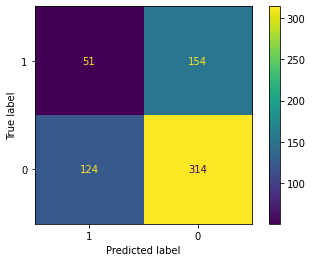


Полнота (recall): 0.24878048780487805
Точность (precision): 0.2914285714285714
F1-мера: 0.26842105263157895
AUC-ROC 0.4828377324869139
Средняя точность (Average precision): 0.31200407497520877


In [60]:
# выведем характеристики качества модели
checking_the_model_for_adequacy(dc_model,
                                features_valid,
                                target_valid)

По матрице ошибок мы видим, что преобладает, более чем в два раза, количество предсказаний класса `-` (0). `FN`= **154**, а `FP`= **124**. Частота ошибок (error rate): `278/365` = **76.1%**, указывает на очень низкое качество модели.

Константная модель имеет очень низкое качество предсказаний, что подтверждают значения: **F1-мера**, **точность (precision)**, **полнота (recall)** и **AUC-ROC**.

**17. Проверим модель "решающее дерево".**

Матрица ошибок ([0][0] = TP, [0][1] = FN;
                [1][0] = FP; [1][1] = TN):


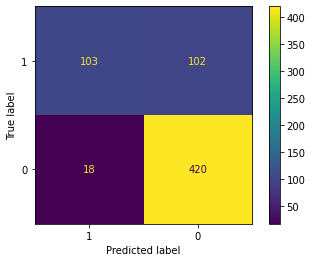


Полнота (recall): 0.5024390243902439
Точность (precision): 0.8512396694214877
F1-мера: 0.6319018404907976
AUC-ROC 0.7306715669896425
Средняя точность (Average precision): 0.5863274442674635


In [61]:
# проверим модель
checking_the_model_for_adequacy(dtc_model,
                                features_valid,
                                target_valid)

По матрице ошибок мы видим, что преобладает, более чем  в четыре раза, количество предсказаний класса `-`(0). `FN` = **102**, а `FP` = **18**. Частота ошибок (error rate): `120/523` = **22.9%**.

`F1-мера` (показатель эффективности модели) указывает на низкое качество модели. Но данная метрика зависит от сбалансированности классов, а наши выборки (исходная, обучающая, валидационная и тестовая) имеют дисбаланс.

Метрика `AUC-ROC` (оценка качества бинарной классификации) выше на `10%` и нечувствительна к сбалансированности классов, что показывает на среднее качество предсказаний модели и в нашем случае является более точной метрикой качества модели.

**18. Проверим модель "случайный лес".**

Матрица ошибок ([0][0] = TP, [0][1] = FN;
                [1][0] = FP; [1][1] = TN):


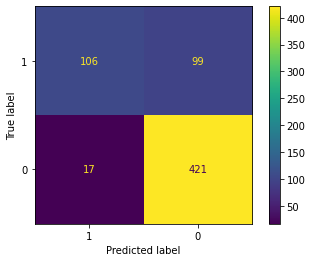


Полнота (recall): 0.5170731707317073
Точность (precision): 0.8617886178861789
F1-мера: 0.6463414634146342
AUC-ROC 0.7391301926717897
Средняя точность (Average precision): 0.5995735585319287


In [62]:
# проверим модель
checking_the_model_for_adequacy(rfc_model,
                                features_valid,
                                target_valid)

По матрице ошибок мы видим, что преобладает, более чем  в четыре раза, количество предсказаний класса `-` (0). `FN` = **99**, а `FP` = **17**. Частота ошибок (error rate): `116/527` = **22.0%**.

`F1`-мера (показатель эффективности модели) указывает на низкое качество модели. Но данная метрика зависит от сбалансированности классов, а наши выборки (исходная, обучающая, валидационная и тестовая) имеют дисбаланс.

Метрика `AUC-ROC` (оценка качества бинарной классификации) выше на `10%` и нечувствительна к сбалансированности классов, что показывает на среднее качество предсказаний модели и в нашем случае является более точной метрикой качества модели.

**19. Проверим модель "логистическая регрессия".**

Матрица ошибок ([0][0] = TP, [0][1] = FN;
                [1][0] = FP; [1][1] = TN):


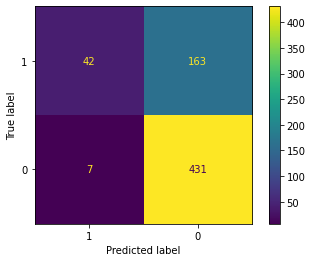


Полнота (recall): 0.2048780487804878
Точность (precision): 0.8571428571428571
F1-мера: 0.3307086614173228
AUC-ROC 0.5944481568103352
Средняя точность (Average precision): 0.42910897849258434


In [63]:
# проверим модель
checking_the_model_for_adequacy(lr_model,
                                features_valid,
                                target_valid)

По матрице ошибок мы видим, что преобладает, более чем  в четыре раза, количество предсказаний класса `-` (0). `FN` = **163**, а `FP` = **7**. Частота ошибок (error rate): `170/473` = **35.9%**, указывает на очень низкое качество модели.

`F1`-мера (показатель эффективности модели) указывает на очень низкое качество модели. Но данная метрика зависит от сбалансированности классов, а наши выборки (исходная, обучающая, валидационная и тестовая) имеют дисбаланс.

Метрика `AUC-ROC` (оценка качества бинарной классификации) выше на `16%` и нечувствительна к сбалансированности классов, поэтому, в нашем случае, является более точной метрикой качества модели, что дополнительно подтверждает очень низкое качество модели.

**Общий вывод**

Все наши три модели лучше константной и полностью адекватны. Оклонений и аномалий нет.

Первые две модели: решающее дерево и случайный лес, имеют приблизительно одинаковые характеристики прогнозирования, качества и ошибок, но время работы, в несколько раз, лучше у первой модели (решающее дерево), чем у второй, а третья модель существенно отстает от них.

## Итоги проекта

1. Лучшая модель по совокупности критериев (качество прогнозирования и время выполнения): `DecisionTreeClassifier`.
    
Время работы: `1.4` миллисекунд.
    
Гиперпараметры модели:
    
* `criterion`         - **entropy**;
* `splitter`          - **random**;
* `max_depth`         - **5**;
* `min_samples_split` - **2**;
* `min_samples_leaf`  - **6**.


2. `accuracy` - доля правильных ответов модели, на тестовой выборке: `0.7947122861586314`.
    
3. Исходные данные, и полученные из них выборки (обучающая, валидационная, тестовая), имеют дисбаланс, а критерий
качества модели `accuracy` чуствителен к дисбалансу классов. По этой причине, мы оценивали модель и по другим критериям, например, по критерию `ROC AUC`(оценка качества бинарной классификации). 

Другие критерии качества модели (получены на тестовой выборке):
* `Полнота (recall):`                     -  **0.47**;
* `Точность (precision):`                 - **0.7833333333333333**;
* `F1-мера:`                              - **0.5874999999999999**;
* `AUC-ROC: `                             - **0.7056546275395033**;
* `Средняя точность (Average precision):` - **0.533018921721099**.
    



Критерии качества прогнозирования модели, полученные на валидационной выборке, несущественно отличаются от критериев полученных на тестовой выборке, что говорит об устойчивости модели к новым входным данным.



Влияние дисбаланса классов на наши модели:
 - в деревьях решений (и их обобщениях – случайном лесе), дисбаланс классов влияет на меры неоднородности (impurity) листьев, но это влияние примерно пропорционально для всех кандидатов в очередную разбивку (split), и потому обычно не особо влияет на выбор разбивок;
 - в логистической регрессии баланс классов сильно влияет на свободный член, но очень слабо – на коэффициенты наклона.


*Рекомендации по улучшению модели*:
   - собрать большой массив исходных данных для обучения модели;
   - обучить модель на большом массиве данных;
   - скорректировать гиперпараметры.